In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from scipy.linalg import norm
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# 1

In [2]:
d1 = 'school of information'
d2 = 'school of informatics and computing'
d3 = ' school of information and library science'
q = 'computer information'

In [3]:
all_data = [d1,d2,d3,q]

## 1.A

In [4]:
cv = CountVectorizer()
cv_fit = cv.fit_transform(all_data)

In [5]:
pd.DataFrame(cv_fit.toarray(), columns = cv.get_feature_names())

D:\Anaconda\envs\All\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,and,computer,computing,informatics,information,library,of,school,science
0,0,0,0,0,1,0,1,1,0
1,1,0,1,1,0,0,1,1,0
2,1,0,0,0,1,1,1,1,1
3,0,1,0,0,1,0,0,0,0


In [6]:
cv_fit.toarray()

array([[0, 0, 0, 0, 1, 0, 1, 1, 0],
       [1, 0, 1, 1, 0, 0, 1, 1, 0],
       [1, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 1, 0, 0, 1, 0, 0, 0, 0]], dtype=int64)

## 1.B

In [7]:
def cos(a,b):
    cos_sim = np.dot(a, b)/(norm(a)*norm(b))
    return cos_sim

In [8]:
def cos_result(all_data, num):
    dic = {}
    cv = CountVectorizer()
    cv_fit = cv.fit_transform(all_data)
    print(pd.DataFrame(cv_fit.toarray(), columns = cv.get_feature_names()))
    for i in range(num):
        c = cos(cv_fit.toarray()[i], cv_fit.toarray()[-1])
        
        name = 'Cosine similarity of q and d '+ str(i+1) + ' is '
        dic[name] = c
    return sorted(dic.items(), key=lambda x: x[1], reverse=True)

In [9]:
cos_result(all_data,3)

   and  computer  computing  informatics  information  library  of  school  \
0    0         0          0            0            1        0   1       1   
1    1         0          1            1            0        0   1       1   
2    1         0          0            0            1        1   1       1   
3    0         1          0            0            1        0   0       0   

   science  
0        0  
1        0  
2        1  
3        0  


D:\Anaconda\envs\All\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[('Cosine similarity of q and d 1 is ', 0.40824829046386296),
 ('Cosine similarity of q and d 3 is ', 0.2886751345948129),
 ('Cosine similarity of q and d 2 is ', 0.0)]

In [10]:
# def cos_result_one_one(data):

#     for i in range(3):
#         cv = CountVectorizer()
#         cv_fit = cv.fit_transform([data[i], q])
#         print(pd.DataFrame(cv_fit.toarray(), columns = cv.get_feature_names()))
#         c = cos(cv_fit.toarray()[0], cv_fit.toarray()[1])
#         name = 'Cosine similarity of q and d '+ str(i+1) + ' is '
#         dic[name] = c
#     return sorted(dic.items(), key=lambda x: x[1], reverse=True)

In [11]:
#cos_result_one_one(all_data)

## 1.C

In [12]:
def remove_stop_word(text):
    words = [word for word in text.split() if word.lower() not in ENGLISH_STOP_WORDS]
    new_text = " ".join(words)
    return new_text

In [13]:
removed = [remove_stop_word(d1), remove_stop_word(d2), remove_stop_word(d3), remove_stop_word(q)]

In [14]:
cos_result(removed,3 )

   computer  computing  informatics  information  library  school  science
0         0          0            0            1        0       1        0
1         0          1            1            0        0       1        0
2         0          0            0            1        1       1        1
3         1          0            0            1        0       0        0


D:\Anaconda\envs\All\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[('Cosine similarity of q and d 1 is ', 0.4999999999999999),
 ('Cosine similarity of q and d 3 is ', 0.35355339059327373),
 ('Cosine similarity of q and d 2 is ', 0.0)]

## 1.D

In [15]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def stem(d):
    return  ' '.join([ps.stem(words_sent) for words_sent in word_tokenize(remove_stop_word(d))])

In [16]:
stemmed = [stem(d1), stem(d2), stem(d3), stem(q)]

In [17]:
stemmed

['school inform',
 'school informat comput',
 'school inform librari scienc',
 'comput inform']

In [18]:
cos_result(stemmed, 3)

   comput  inform  informat  librari  school  scienc
0       0       1         0        0       1       0
1       1       0         1        0       1       0
2       0       1         0        1       1       1
3       1       1         0        0       0       0


D:\Anaconda\envs\All\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[('Cosine similarity of q and d 1 is ', 0.4999999999999999),
 ('Cosine similarity of q and d 2 is ', 0.40824829046386296),
 ('Cosine similarity of q and d 3 is ', 0.35355339059327373)]

## 1.E

In [19]:
d4 = 'school of information and library science school of information and library science'

In [20]:
all_data.append(d4)

In [21]:
all_data[-1], all_data[-2] = all_data[-2], all_data[-1]

In [22]:
all_data

['school of information',
 'school of informatics and computing',
 ' school of information and library science',
 'school of information and library science school of information and library science',
 'computer information']

In [23]:
cos_result(all_data, 4)

   and  computer  computing  informatics  information  library  of  school  \
0    0         0          0            0            1        0   1       1   
1    1         0          1            1            0        0   1       1   
2    1         0          0            0            1        1   1       1   
3    2         0          0            0            2        2   2       2   
4    0         1          0            0            1        0   0       0   

   science  
0        0  
1        0  
2        1  
3        2  
4        0  


D:\Anaconda\envs\All\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[('Cosine similarity of q and d 1 is ', 0.40824829046386296),
 ('Cosine similarity of q and d 3 is ', 0.2886751345948129),
 ('Cosine similarity of q and d 4 is ', 0.2886751345948129),
 ('Cosine similarity of q and d 2 is ', 0.0)]

# 2

In [24]:
l = [[1,1,1,1], [1,1,1,0],[1,1,1,0], [0,1,0,0],[0,1,1,1],[1,0,1,0],[1,0,1,1],[0,0,0,0],[0,0,1,0],[0,0,1,1],[0,0,0,0],[1,1,0,0]]

In [25]:
df_2 = pd.DataFrame(l, columns=['Y', 'H', 'U', 'L'])

In [26]:
df_2

,Y,H,U,L
0,1,1,1,1
1,1,1,1,0
2,1,1,1,0
3,0,1,0,0
4,0,1,1,1
5,1,0,1,0
6,1,0,1,1
7,0,0,0,0
8,0,0,1,0
9,0,0,1,1


## 2.A

In [27]:
#P(H|Y) = P(HY)/ P(Y) 
v2 ={}
for i in range(2):
    for j in df_2.columns[1:]:
        y_prob = sum((df_2['Y'] ==i))/12
        e = sum((df_2['Y'] ==i) & (df_2[j] ==1)) / 12
        
        name = 'P(' + j +'='+'1|Y='+ str(i)+')'
        v2[name] =e/y_prob 
v2

{'P(H=1|Y=0)': 0.3333333333333333,
 'P(U=1|Y=0)': 0.5,
 'P(L=1|Y=0)': 0.3333333333333333,
 'P(H=1|Y=1)': 0.6666666666666666,
 'P(U=1|Y=1)': 0.8333333333333334,
 'P(L=1|Y=1)': 0.3333333333333333}

## 2.B

## 2.C

# 3

In [28]:
0.1/1 + 0.1/2 + 0.1/3+ 0.1/4+ 0.1/5

0.22833333333333333

# 4

## 4A

In [29]:
def process_text(line):
	s = line.lower().strip().split()
	return s

In [45]:
def plotting(file):
    vocabulary = {}
    
    with open(file) as f:
        text = f.read().lower().strip().split()
    for line in text:
        for word in process_text(line):
            if word not in vocabulary:
                vocabulary[word] = 1  # initialize the counter
            else:
                vocabulary[word] += 1 # increment the counter
    sorted_words = dict(sorted(vocabulary.items(), key=lambda x: x[1], reverse=True))
    
    fre_df = pd.DataFrame.from_dict(sorted_words, orient='index', columns=['frequency'])
    #fre_df['fraction'] = 1/(fre_df.frequency*(fre_df.frequency+1))
    
    fre_df['fraction'] = fre_df.groupby('frequency')['frequency'].transform('count')/len(fre_df.frequency)
    #print(fre_df)
    
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(file +' => linear and log-log')
    ax1.plot(fre_df['frequency'], fre_df['fraction'])
    ax2.plot(np.log10(fre_df['frequency']), np.log10(fre_df['fraction']))

    plt.show()
    return fre_df

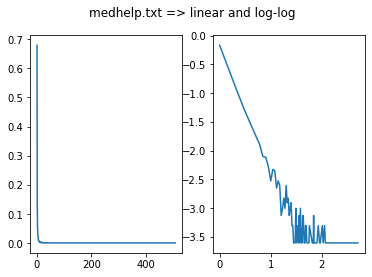

In [46]:
medhelp = plotting('medhelp.txt')

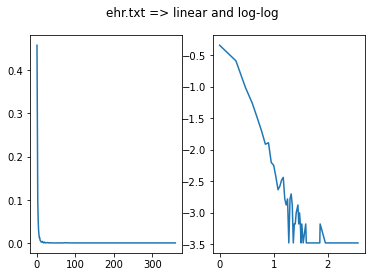

In [47]:
ehr = plotting('ehr.txt')

## 4B

In [33]:
m = medhelp.iloc[:50,:].index
e= ehr.iloc[:50,:].index
m, e

(Index(['i', 'the', 'to', 'and', 'a', 'you', 'of', 'is', 'it', 'my', 'have',
        'in', 'for', 'that', 'with', 'on', 'are', 'your', 'be', 'but', 'not',
        'this', 'if', 'so', 'will', 'or', 'was', 'can', 'as', 'me', 'they',
        'all', 'get', 'just', 'he', 'at', 'am', 'had', 'from', 'what', 'very',
        'one', 'do', 'like', 'about', 'no', 'an', 'some', 'would', 'i'm'],
       dtype='object'),
 Index(['and', 'with', 'to', 'the', 'of', 'was', 'she', 'a', 'in', 'on', 'for',
        'he', 'her', 'at', 'is', 'had', 'patient', 'has', 'not', 'no', 'pt',
        'by', 'an', 'his', 'but', 'or', 'abdominal', 'that', 'who', 'as',
        'from', 'pain', 'also', 'denies', 'atrial', 'blood', 'chest', 'given',
        's/p', 'history', 'presents', 'this', 'which', 'pain,', 'after',
        'right', '/', 'have', 'be', 'were'],
       dtype='object'))

In [34]:
len(np.union1d(m, e))

75

In [35]:
len(np.intersect1d(m,e))

25

In [36]:
jaccard = 25/75
jaccard

0.3333333333333333

In [37]:
np.setdiff1d(m, np.intersect1d(m,e))

array(['about', 'all', 'am', 'are', 'can', 'do', 'get', 'i', "i'm", 'if',
       'it', 'just', 'like', 'me', 'my', 'one', 'so', 'some', 'they',
       'very', 'what', 'will', 'would', 'you', 'your'], dtype=object)

In [38]:
np.setdiff1d(e, np.intersect1d(m,e))

array(['/', 'abdominal', 'after', 'also', 'atrial', 'blood', 'by',
       'chest', 'denies', 'given', 'has', 'her', 'his', 'history', 'pain',
       'pain,', 'patient', 'presents', 'pt', 'right', 's/p', 'she',
       'were', 'which', 'who'], dtype=object)